<a href="https://colab.research.google.com/github/cantaruttim/Rotinas/blob/main/estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

precisamos agora realizar a seguinte operação

$$ ui = q2 - xi$$

$$ vi = x(n + 1 - i)$$

In [3]:
df = pd.read_csv("dados.csv")
serie = df['Idade'].values
serie, len(serie)

(array([23, 23, 35, ..., 32, 57, 38]), 76840)

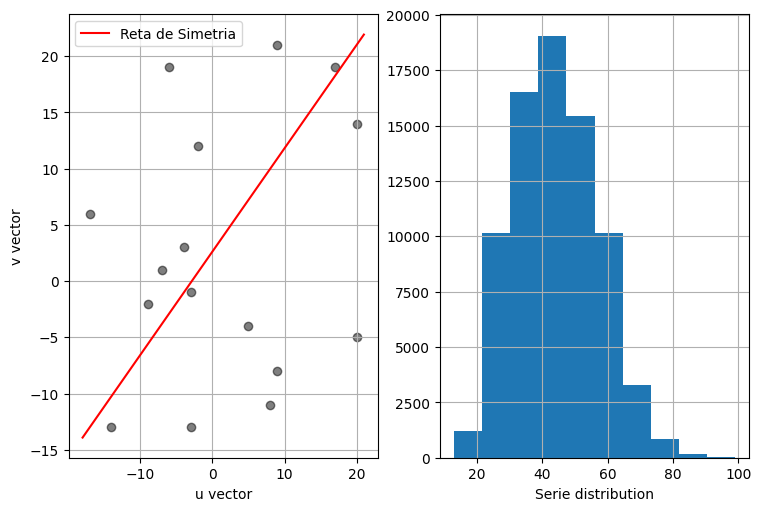

In [4]:
## função completa

import matplotlib.pyplot as plt
import statsmodels as stats
import numpy as np
import pandas as pd
import seaborn as sns
import math

df = pd.read_csv("dados.csv")
l = df['Idade'].values

def similarity(l):

  serie = l

  u = []
  v = []
  q2 = np.median(l)

  for i in range(len(l)):

    if (q2 - l[i]) == 0:
      break

    else:
      u.append(q2 - l[i])


  for j in range(len(l) + 1):

    if (l[-j] - q2) == 0:
      break

    else:
      v.append(l[-j] - q2)

  return u, v[1:], q2


u, v, q2 = similarity(l)

def letter_equation(u, v):

  m = ( (np.max(v) - np.min(v)) / (np.max(u) - np.min(u) ) )
  b = np.min(v) - m * np.min(u)
  u_values = [np.min(u) - 1, np.max(u) + 1]
  v_values = [m * x_val + b for x_val in u_values]

  return u_values, v_values

u_values, v_values = letter_equation(u, v)

def plotting_similarity(u, v):
  fig, ax = plt.subplots(1, 2, figsize=(7.5,5), layout='constrained')

  ax[0].scatter(u, v, c='black', alpha=0.5)
  ax[0].plot(u_values, v_values, c="red", label = "Reta de Simetria")
  ax[0].grid(True)
  ax[0].set_xlabel("u vector")
  ax[0].set_ylabel("v vector")
  ax[0].legend(loc="upper left")

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)


plotting_similarity(u, v);

In [16]:
def identifica_ponto(u, y):
  return math.sqrt((u - y) ** 2)

p = []

# Calcular as distâncias para cada par de elementos correspondentes em u e v
for i in range(len(u)):
    pontos = identifica_ponto(u[i], v[i])
    p.append(pontos)
print(p)

[25.0, 6.0, 19.0, 10.0, 7.0, 17.0, 1.0, 23.0, 8.0, 2.0, 2.0, 25.0, 7.0, 9.0, 14.0, 12.0]
